In [84]:
!pip install pyforest
!pip install xgboost

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


data dict:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf


# Import libraries

In [2]:
import pyforest
import warnings
warnings.filterwarnings('ignore')

# Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1')

<IPython.core.display.Javascript object>

In [4]:
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

<IPython.core.display.Javascript object>

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
- Find unusual value in Weightlbs

In [5]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [6]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [7]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [ ]:
#df.columns = df.columns.lower()

In [8]:
data = pd.concat([df_male,df_female], axis=0,ignore_index=True)

<IPython.core.display.Javascript object>

In [9]:
data.shape

(6068, 109)

In [10]:
data

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,...,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,...,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,...,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,...,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,...,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,NaN,285,1392,335,223,1297,252,196,368,299,...,42A,Texas,3,Mexican,3,51,67,180,Right hand,29501.0
6064,NaN,262,1324,301,202,1204,236,181,378,294,...,25U,Texas,3,Mexican,3,40,63,150,Right hand,29502.0
6065,NaN,260,1334,318,213,1259,234,183,363,332,...,42A,Texas,2,NaN,2,40,66,168,Right hand,29503.0
6066,NaN,205,1293,302,199,1207,213,163,376,276,...,92Y,Texas,3,Mexican,3,31,63,133,Right hand,29511.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 109 entries, subjectid to SubjectId
dtypes: float64(2), int64(98), object(9)
memory usage: 5.0+ MB


In [12]:
data.isnull().sum().any()

True

In [13]:
data.duplicated().sum()

0

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


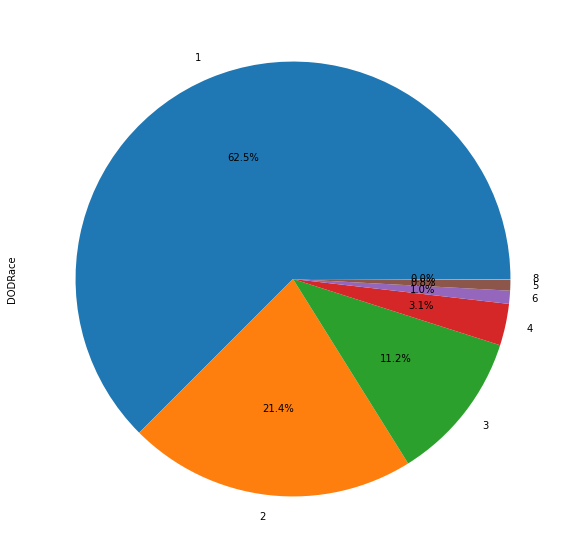

In [14]:
print(data["DODRace"].value_counts())
data["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

In [15]:
drop_list =[]
for col in data.columns:
  if data[col].isnull().sum()>1800:
    print(f"{col} = {data[col].isnull().sum()}")
    drop_list.append(col)
  
  
drop_list 

subjectid = 1986
Ethnicity = 4647
SubjectId = 4082


['subjectid', 'Ethnicity', 'SubjectId']

In [16]:
data.drop(drop_list,axis=1, inplace=True)

In [17]:
data.isnull().sum().any()

False

In [18]:
data.shape

(6068, 106)

In [19]:
# to find how many unique values object features have
for col in data.select_dtypes(exclude=[np.number]).columns:
  print(f"{col} has {data[col].nunique()} unique value")
    

<IPython.core.display.Javascript object>

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [20]:
data.groupby(["Component"])["DODRace"].value_counts()

Component            DODRace
Army National Guard  1          1855
                     2           499
                     3           253
                     4            60
                     5            24
                     6            17
Army Reserve         1           114
                     2            52
                     3            41
                     4             9
                     6             3
                     5             1
Regular Army         1          1823
                     2           747
                     3           385
                     4           119
                     6            39
                     5            24
                     8             3
Name: DODRace, dtype: int64

In [21]:
data.groupby(["Component","Branch"])["DODRace"].value_counts()

Component            Branch                  DODRace
Army National Guard  Combat Arms             1          623
                                             2           79
                                             3           74
                                             4           18
                                             5            9
                                             6            4
                     Combat Service Support  1          917
                                             2          312
                                             3          142
                                             4           33
                                             6           11
                                             5           10
                     Combat Support          1          315
                                             2          108
                                             3           37
                                             4 

In [22]:
drop_list1 = ["Date", "Installation", "Component","PrimaryMOS"]

data.drop(drop_list1,axis=1,inplace=True)

In [23]:
data.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'wristheight', 'Gender', 'Branch', 'SubjectsBirthLocation',
       'SubjectNumericRace', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=102)

In [24]:
data.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
18         18
5          18
25         14
351        10
38          9
35          8
64          8
62          8
63          7
42          7
231         6
43          5
235         4
218         3
651         2
641         2
2351        2
318         2
423         2
431         2
451         2
2518        2
425         1
4251        1
238         1
358         1
428         1
48          1
631         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [25]:
data.drop("SubjectNumericRace",axis=1,inplace=True)

In [26]:
data.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [27]:
data["DODRace"] = data.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic", 4 : "Asian", 5 : "Native American", 6 : "Pacific Islander", 8 : "Other"})

In [28]:
data.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [ ]:
#df2 = df[df["DODRace"].isin([1,2,3])]

#df[df["DODRace"].isin([1,2,3])]


In [29]:
data = data[(data["DODRace"] == "White") | (data["DODRace"] == "Black") | (data["DODRace"] == "Hispanic")]
data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,175,853,Male,Combat Arms,North Dakota,White,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,167,815,Male,Combat Support,New York,White,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,180,831,Male,Combat Support,New York,Black,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,176,793,Male,Combat Service Support,Wisconsin,White,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,188,954,Male,Combat Service Support,North Carolina,Black,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,285,1392,335,223,1297,252,196,368,299,312,...,162,836,Female,Combat Support,Texas,Hispanic,51,67,180,Right hand
6064,262,1324,301,202,1204,236,181,378,294,287,...,157,804,Female,Combat Support,Texas,Hispanic,40,63,150,Right hand
6065,260,1334,318,213,1259,234,183,363,332,299,...,159,774,Female,Combat Support,Texas,Black,40,66,168,Right hand
6066,205,1293,302,199,1207,213,163,376,276,280,...,146,769,Female,Combat Support,Texas,Hispanic,31,63,133,Right hand


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Columns: 101 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(96), object(5)
memory usage: 4.5+ MB


In [31]:
data.reset_index(drop=True, inplace=True)

In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.0,247.254290,37.457748,155.0,220.0,243.0,272.0,451.0
acromialheight,5769.0,1408.630265,78.303123,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5769.0,328.071590,20.444554,249.0,314.0,328.0,342.0,393.0
anklecircumference,5769.0,225.201768,15.965783,156.0,214.0,225.0,235.0,293.0
axillaheight,5769.0,1301.902583,71.260913,1062.0,1252.0,1304.0,1351.0,1553.0
...,...,...,...,...,...,...,...,...
wristcircumference,5769.0,169.308372,13.060900,124.0,159.0,171.0,179.0,216.0
wristheight,5769.0,831.334547,47.321580,688.0,798.0,831.0,864.0,1009.0
Age,5769.0,29.776391,8.706610,17.0,23.0,28.0,36.0,58.0
Heightin,5769.0,68.359508,3.836336,56.0,66.0,69.0,71.0,94.0


In [ ]:
for col in data.select_dtypes(include=[np.number]).columns:
    if data[col].min() == 0:
        print(col)

In [34]:
data["Weightlbs"].argmin()

824

In [35]:
data.drop(index = data["Weightlbs"].argmin(), inplace=True)

In [36]:
data.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

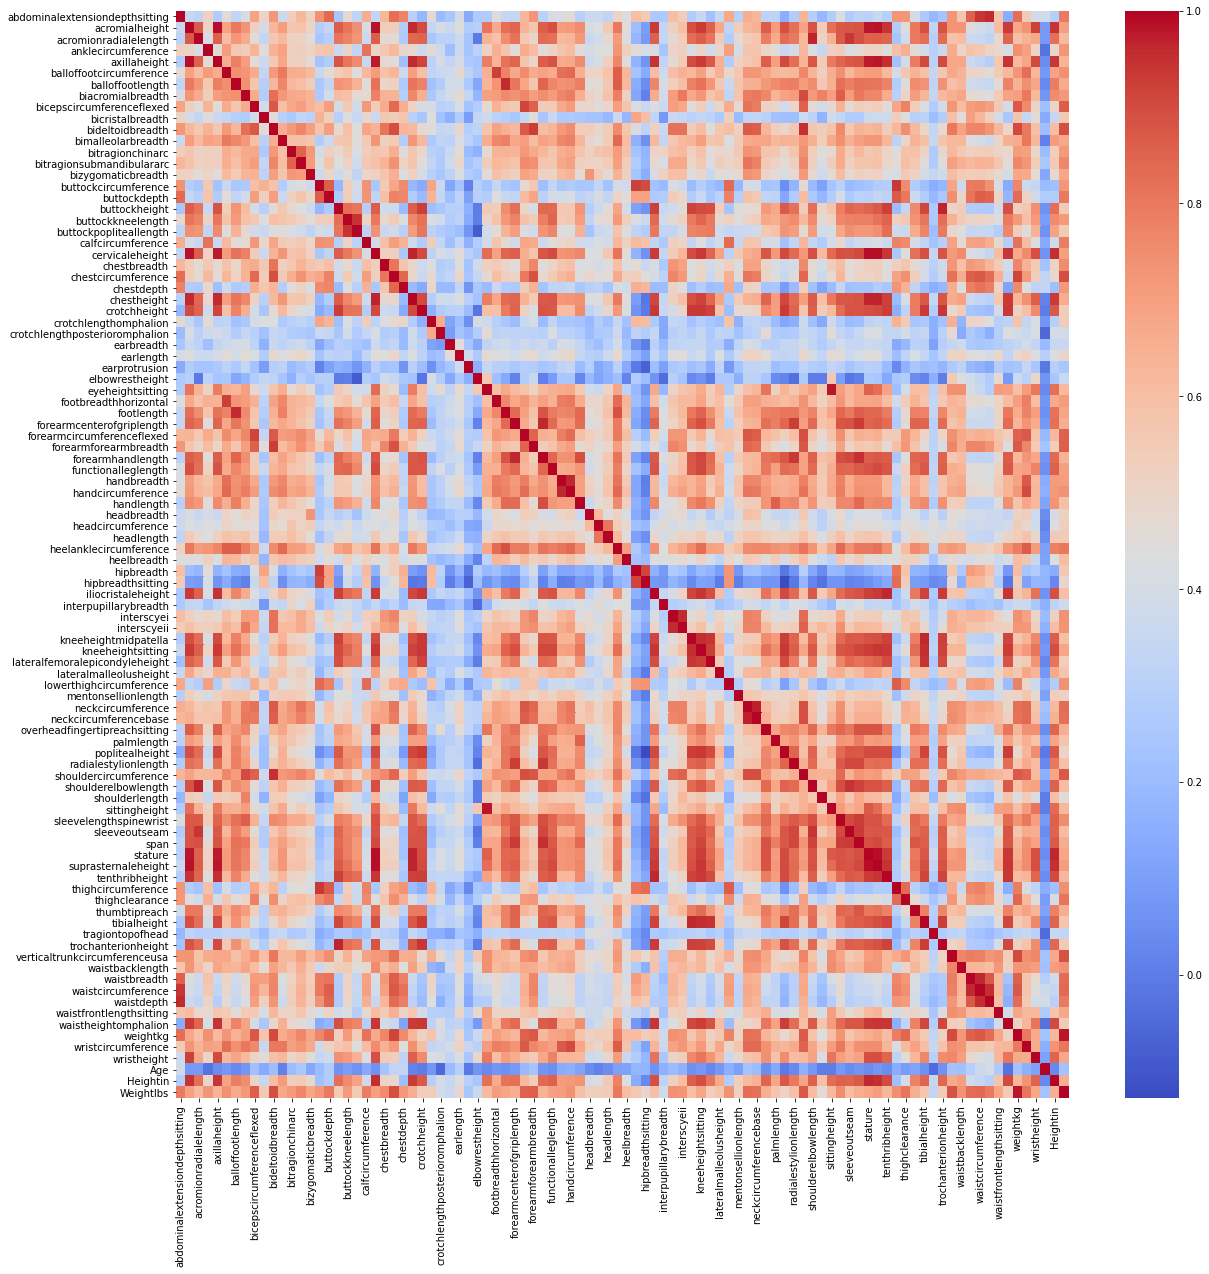

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap ="coolwarm")

In [38]:
df_temp = data.corr()

count = "done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                # print(f"multicolinearity alert in between {col} - {i}")
print("Number of strong corelated features:", count) 

Number of strong corelated features: done


In [39]:
df_col = pd.DataFrame([feature, collinear], index=["feature","collinear"]).T
df_col

<IPython.core.display.Javascript object>

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
...,...,...
297,Heightin,chestheight
298,Heightin,stature
299,Heightin,suprasternaleheight
300,Heightin,waistheightomphalion


In [40]:
df_col.value_counts("feature")

feature
kneeheightsitting             19
axillaheight                  15
cervicaleheight               15
waistheightomphalion          15
iliocristaleheight            15
                              ..
interscyei                     1
forearmcircumferenceflexed     1
forearmforearmbreadth          1
wristcircumference             1
hipbreadthsitting              1
Length: 61, dtype: int64

# DATA Preprocessing

In [41]:
X= data.drop("DODRace",axis=1)
X = pd.get_dummies(data=X,drop_first=True)
y= data.DODRace

<IPython.core.display.Javascript object>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6, stratify =y)

<IPython.core.display.Javascript object>

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler =MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

## 1. Logistic model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

test scores 
--------------
[[239  11  10]
 [  6 104  25]
 [ 16  99 644]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       260
    Hispanic       0.49      0.77      0.60       135
       White       0.95      0.85      0.90       759

    accuracy                           0.86      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.89      0.86      0.87      1154



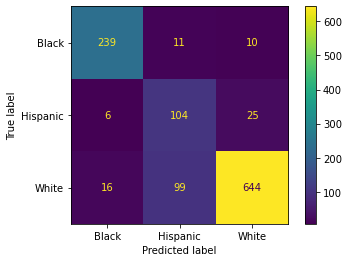

In [46]:
log_model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=6)

log_model.fit(X_train,y_train)

y_pred = log_model.predict(X_test)

print("test scores","\n--------------")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(log_model,X_test,y_test,values_format='.0f')

train scores 
--------------
[[ 966   46   26]
 [  21  453   69]
 [  64  353 2616]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92      1038
    Hispanic       0.53      0.83      0.65       543
       White       0.96      0.86      0.91      3033

    accuracy                           0.87      4614
   macro avg       0.81      0.88      0.83      4614
weighted avg       0.90      0.87      0.88      4614



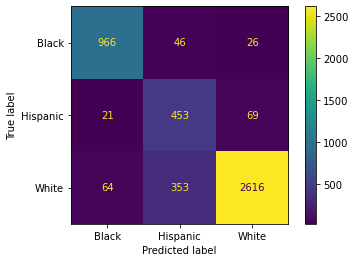

In [47]:
y_pred = log_model.predict(X_train)
print("train scores","\n--------------")
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(log_model,X_train,y_train);

In [48]:
f1score= make_scorer(f1_score, average="weighted", pos_label= "Hispanic")
f1score

make_scorer(f1_score, average=weighted, pos_label=Hispanic)

In [49]:
model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=6)
scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = f1score, n_jobs = -1)
print([round(i, 4) for i in scores], "\n")
print(f" f1score : %{scores.mean()*100:.2f}, std : %{scores.std()*100:.3f} \n")

[0.8656, 0.8698, 0.8635, 0.874, 0.8708] 

 f1score : %86.87, std : %0.374 



In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
f1_Hispanic =  make_scorer(f1_score, average='weighted', pos_label = "Hispanic")

In [52]:
param_grid = { "class_weight" : ["balanced", None],
              'penalty': ["l1","l2"],
              'solver' : ['saga','lbfgs'],
              }

In [53]:
model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=6)
log_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring=f1_Hispanic, refit=True,n_jobs=-1)

In [54]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.3min finished


GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, random_state=6),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'], 'solver': ['saga', 'lbfgs']},
             scoring=make_scorer(f1_score, average=weighted, pos_label=Hispanic),
             verbose=3)

In [55]:
log_model_grid.best_params_

{'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}

[[234   3  23]
 [  8  73  54]
 [  7  15 737]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.80      0.54      0.65       135
       White       0.91      0.97      0.94       759

    accuracy                           0.90      1154
   macro avg       0.88      0.80      0.83      1154
weighted avg       0.90      0.90      0.90      1154



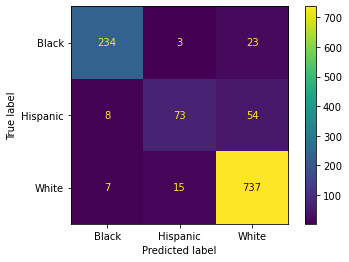

In [56]:
y_pred = log_model_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(log_model_grid,X_test,y_test);

In [57]:
from sklearn.metrics import roc_curve, auc

In [58]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

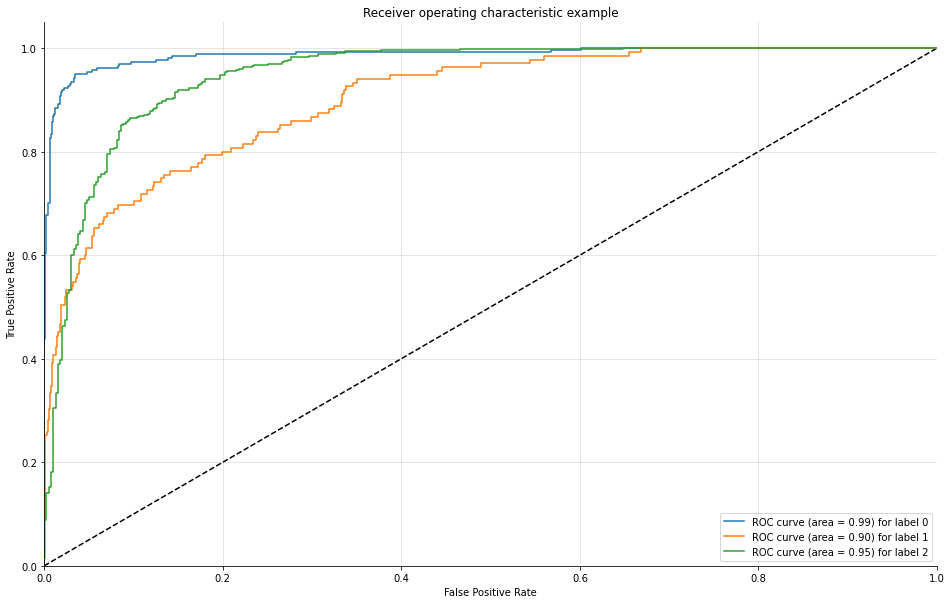

In [59]:
plot_multiclass_roc(log_model_grid, X_test, y_test, n_classes=3, figsize=(16, 10))

## 2. SVC

In [60]:
from sklearn.svm import SVC

test scores 
--------------
[[239   9  12]
 [  8 102  25]
 [ 14 118 627]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       260
    Hispanic       0.45      0.76      0.56       135
       White       0.94      0.83      0.88       759

    accuracy                           0.84      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.84      0.85      1154



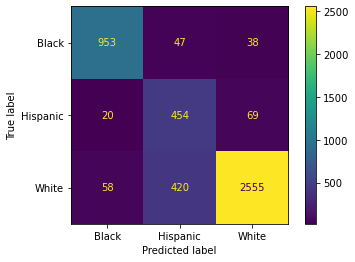

In [61]:
svm_model = SVC(class_weight="balanced")

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("test scores","\n--------------")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svm_model,X_train,y_train);

train scores 
--------------
[[ 953   47   38]
 [  20  454   69]
 [  58  420 2555]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3033

    accuracy                           0.86      4614
   macro avg       0.79      0.87      0.81      4614
weighted avg       0.90      0.86      0.87      4614



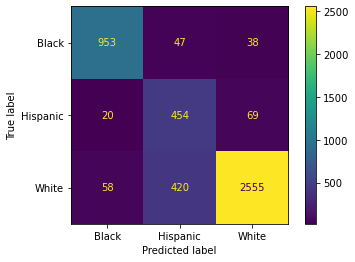

In [62]:
y_pred = svm_model.predict(X_train)

print("train scores","\n--------------")

print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(svm_model,X_train,y_train);

model = SVC('class_weight="balanced"')
scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = f1_Hispanic, n_jobs = -1)
#print([round(i, 4) for i in scores], "\n")
print(f" {i:20} : %{scores.mean()*100:.2f}, std : %{scores.std()*100:.3f} \n")

In [63]:
param_grid = {'C': np.linspace(200,400,5),
              'decision_function_shape' : ['ovr','ovo'],
              'gamma': ["scale", "auto", 1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight':["balanced",None]}

<IPython.core.display.Javascript object>

In [64]:
f1_Hispanic =  make_scorer(f1_score, average='weighted', pos_label = "Hispanic")

In [65]:
model = SVC(class_weight="balanced")
svm_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring=f1_Hispanic, refit=True,n_jobs=-1)

In [66]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.1min finished


GridSearchCV(estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': array([200., 250., 300., 350., 400.]),
                         'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01],
                         'kernel': ['rbf']},
             scoring=make_scorer(f1_score, average=weighted, pos_label=Hispanic),
             verbose=3)

In [67]:
svm_model_grid.best_params_

{'C': 400.0,
 'class_weight': None,
 'decision_function_shape': 'ovr',
 'gamma': 'auto',
 'kernel': 'rbf'}

[[239   2  19]
 [  6  78  51]
 [  8  18 733]]
              precision    recall  f1-score   support

       Black       0.94      0.92      0.93       260
    Hispanic       0.80      0.58      0.67       135
       White       0.91      0.97      0.94       759

    accuracy                           0.91      1154
   macro avg       0.88      0.82      0.85      1154
weighted avg       0.91      0.91      0.91      1154



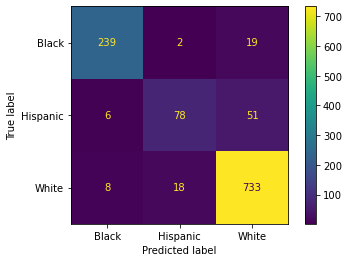

In [68]:
y_pred = svm_model_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(svm_model_grid,X_test,y_test);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

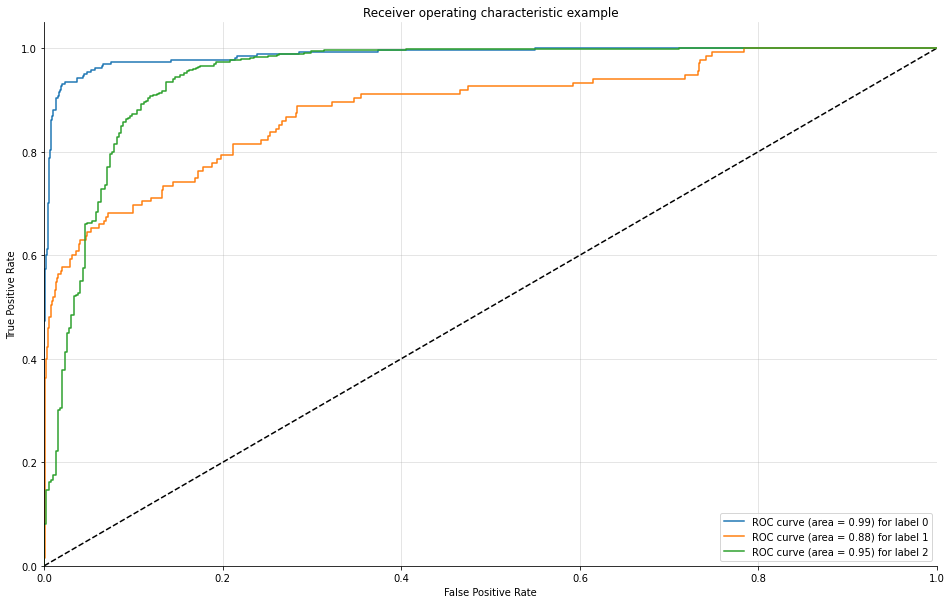

In [69]:
plot_multiclass_roc(svm_model_grid, X_test, y_test, n_classes=3, figsize=(16, 10))

## RF

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf_mod = RandomForestClassifier()

In [72]:
rf_mod.fit(X_train,y_train)

RandomForestClassifier()

[[198   0  62]
 [  9  16 110]
 [ 12   2 745]]
              precision    recall  f1-score   support

       Black       0.90      0.76      0.83       260
    Hispanic       0.89      0.12      0.21       135
       White       0.81      0.98      0.89       759

    accuracy                           0.83      1154
   macro avg       0.87      0.62      0.64      1154
weighted avg       0.84      0.83      0.80      1154



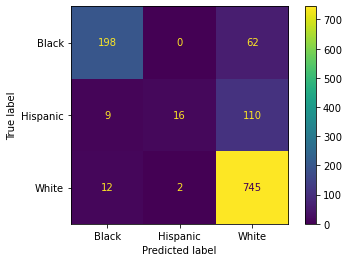

In [73]:
y_pred = rf_mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf_mod,X_test,y_test);

[[1038    0    0]
 [   0  543    0]
 [   0    0 3033]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3033

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614



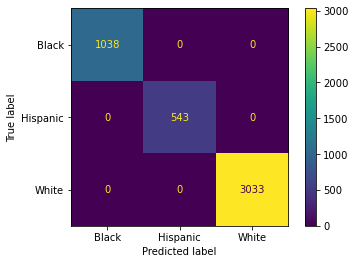

In [74]:
y_pred = rf_mod.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(rf_mod,X_train,y_train);

In [75]:
param_grid = {'n_estimators':[400,500],
             'criterion': ["gini","entropy"],
             'max_depth':[10,12,14,16],
             'min_samples_split':[18,20,22],
             'class_weight': ['balanced',None]}

In [76]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model, param_grid, verbose=3, scoring=f1_Hispanic, refit=True,n_jobs=-1)

In [77]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 18.4min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 16],
                         'min_samples_split': [18, 20, 22],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(f1_score, average=weighted, pos_label=Hispanic),
             verbose=3)

In [78]:
rf_grid_model.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 14,
 'min_samples_split': 20,
 'n_estimators': 500}

[[211   4  45]
 [ 12  41  82]
 [ 24  37 698]]
              precision    recall  f1-score   support

       Black       0.85      0.81      0.83       260
    Hispanic       0.50      0.30      0.38       135
       White       0.85      0.92      0.88       759

    accuracy                           0.82      1154
   macro avg       0.73      0.68      0.70      1154
weighted avg       0.81      0.82      0.81      1154



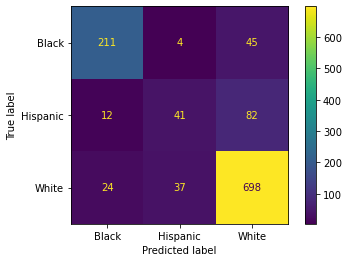

In [79]:
y_pred = rf_grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf_grid_model,X_test,y_test);

In [80]:
def plot_multiclass_roc_for_tree(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

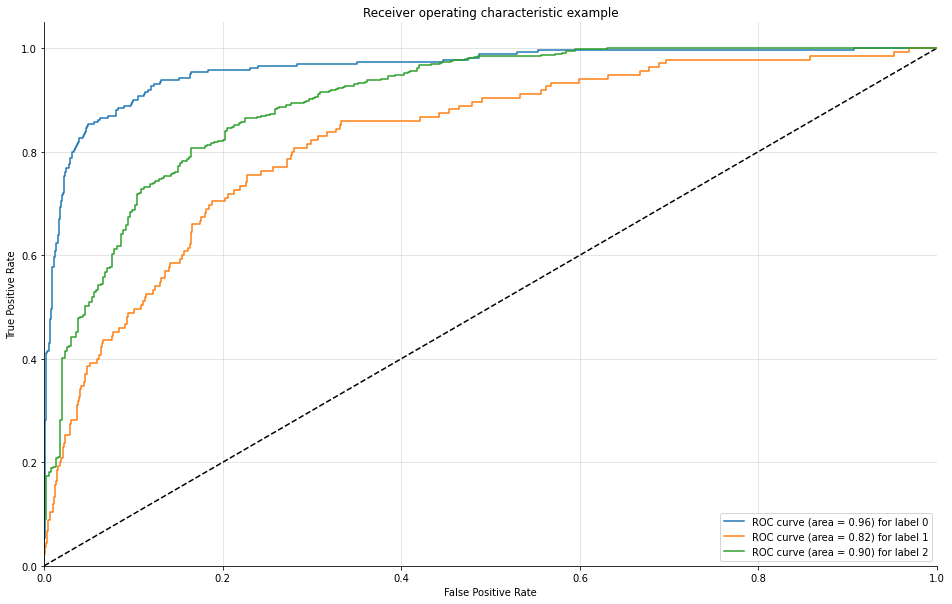

In [81]:
plot_multiclass_roc_for_tree(rf_grid_model, X_test, y_test, n_classes=3, figsize=(16, 10))

## XGBoost

In [85]:
from xgboost import XGBClassifier

In [86]:
xgb_model = XGBClassifier()

In [87]:
xgb_model.fit(X_train,y_train)


[00:24:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[[219   0  41]
 [  9  60  66]
 [ 14  11 734]]
              precision    recall  f1-score   support

       Black       0.90      0.84      0.87       260
    Hispanic       0.85      0.44      0.58       135
       White       0.87      0.97      0.92       759

    accuracy                           0.88      1154
   macro avg       0.87      0.75      0.79      1154
weighted avg       0.88      0.88      0.87      1154



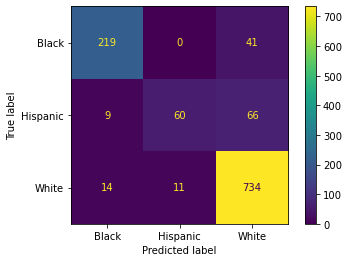

In [88]:
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_model,X_test,y_test);

[[1038    0    0]
 [   0  543    0]
 [   0    0 3033]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3033

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614



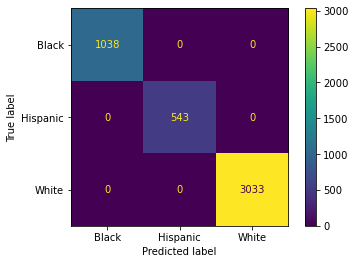

In [89]:
y_pred = xgb_model.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(xgb_model,X_train,y_train);

In [90]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50708869, 0.50708869, 0.50708869, ..., 0.50708869, 0.50708869,
       2.83241252])

In [ ]:
comp = pd.DataFrame(classes_weights)

comp["label"]= y_train.reset_index(drop=True)
comp

In [91]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [92]:
xgb_model = XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring=f1_Hispanic, n_jobs = -1,refit=True, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
exception calling callback for <Future at 0x226ecf28c10 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\queues.py", line 116, in get
    return _ForkingPickler.loads(res)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\__init__.py", line 9, in <module>
    from .core import DMatrix, DeviceQuantileDMatrix, Booster
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 195, in <module>
    _LIB = _load_lib()
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 178, in _load_lib
    raise XGBoostError(
xgboost.core.XGBoostError: XGBoost Librar

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
xgb_grid_model.best_params_

In [ ]:
y_pred = xgb_grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(xgb_grid_model,X_test,y_test);

In [ ]:
plot_multiclass_roc_for_tree(xgb_grid_model, X_test, y_test, n_classes=3, figsize=(16, 10))

---
---

In [ ]:
X.describe().loc["mean"]

In [ ]:
a = pd.DataFrame(X.iloc[200]).T
a

In [ ]:
a = pd.get_dummies(a)

In [ ]:
a = scaler.transform(a)

X_scaled = scaler.fit_transform(X)

{'C': 400.0,
 'class_weight': None,
 'decision_function_shape': 'ovr',
 'gamma': 'auto',
 'kernel': 'rbf'}

In [ ]:
final_model = SVC(C=400,class_weight=None,decision_function_shape="ovr", gamma="auto",kernel="rbf" ).fit(X_scaled,y)

In [ ]:
final_model.predict(X.describe().loc["mean"].values.reshape(1,-1))

In [ ]:
y[200]

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

---
---

---
---